# Imports

In [95]:
from qiskit import *
from qiskit.visualization import plot_histogram

# Enigme : La porte au trésor

### Création du circuit de l'énigme

In [96]:
circ = QuantumCircuit(3,1)

### Pour placer le trésor aléatoirement utilisons la porte Hadamard sur le premier qubit

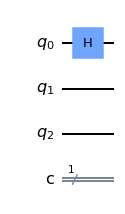

In [97]:
circ.h(0)
circ.draw(output='mpl')

### On place ensuite une porte CNOT entre le premier et le deuxième qubit pour s'assurer que les gardien savent la même chose

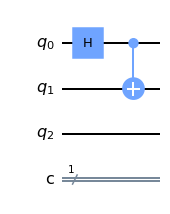

In [98]:
circ.cnot(0,1)
circ.draw(output='mpl')

### On place une porte Hadamard sur le troisième qubit (qubit pour le mensonge) pour avoir une probabilité de 50% d'avoir un mensonge

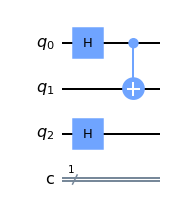

In [99]:
circ.h(2)
circ.draw(output='mpl')

### Si un des gardiens ment, on inverse sa réponse

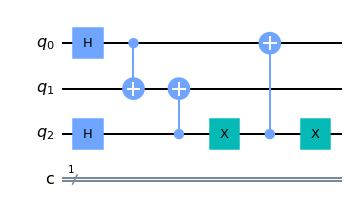

In [100]:
# Gardien 1 ment
circ.cnot(2,1)
circ.x(2)

# Gardien 2 ment
circ.cnot(2,0)
circ.x(2)

circ.draw(output='mpl')

### On place la porte swap entre le premier qbit et le deuxière pour représenter la question : "Que me dirait l'autre gardien si"

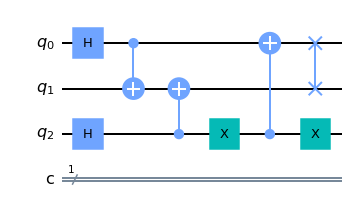

In [101]:
circ.swap(0,1)
circ.draw(output='mpl')

### Comme la question est de demander la porte à ne PAS prendre, plaçons une porte not sur les deux premiers qubits

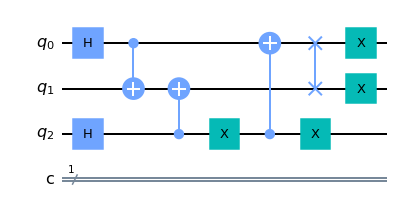

In [102]:
circ.x(0)
circ.x(1)
circ.draw(output='mpl')

### On refait le même procéssus pour le mensonge de la porte mais cette fois sur le mensonge entre les deux gardiens

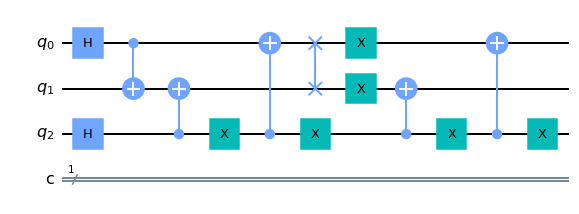

In [103]:
# Gardien 1 ment sur gardien 2
circ.cnot(2,1)
circ.x(2)

# Gardien 2 ment sur gardien 1
circ.cnot(2,0)
circ.x(2)

circ.draw(output='mpl')

### Mesure des qubits pour avoir la réponse

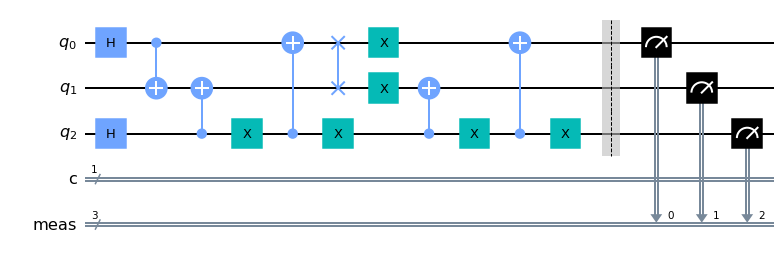

In [104]:
circ.measure_all()

circ.draw(output='mpl')

# Simulation de l'énigme

### On initialise la simulation

In [107]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=simulator, shots=1024).result()

### Affichage du résultat

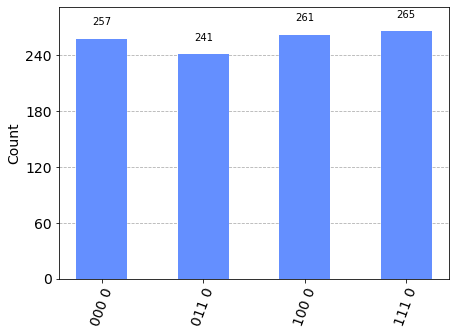

In [108]:
counts = result.get_counts()
plot_histogram(counts)

### Probabilité pour chaque réponse

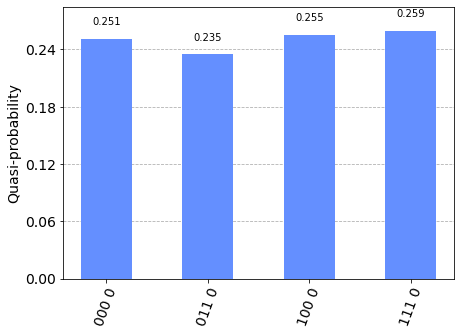

In [113]:
# Calculez les pourcentages
total_shots = sum(counts.values())
percentages = {state: count / total_shots * 100 for state, count in counts.items()}

# Visualisez les pourcentages sous forme d'un histogramme
plot_histogram(percentages)